In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
tf.__version__

'2.5.0'

In [60]:
keras.__version__

'2.5.0'

In [61]:
fashion_mnist = keras.datasets.fashion_mnist

In [62]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [63]:
X_train_full.shape

(60000, 28, 28)

In [64]:
X_train_full.dtype

dtype('uint8')

In [65]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [66]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [67]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [68]:
class_names[y_train[0]]

'Coat'

In [69]:
class_names[y_train[1]]

'T-shirt/top'

In [70]:
class_names[y_train[5]]

'Ankle boot'

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


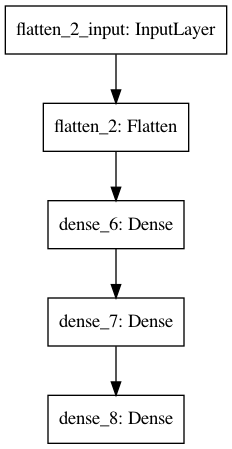

In [78]:
keras.utils.plot_model(model)

In [77]:
model.layers

In [75]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [79]:
model.get_layer('dense') is hidden1

ValueError: No such layer: dense.

In [80]:
weights, biases = hidden1.get_weights()

In [81]:
weights

array([[-0.05251364,  0.05539434,  0.01147684, ...,  0.06096807,
        -0.07112459,  0.07053724],
       [-0.03197981, -0.05133779, -0.00026075, ..., -0.05076677,
         0.05637388, -0.02004403],
       [ 0.01553304, -0.02982748,  0.02607564, ..., -0.0027376 ,
         0.06820552,  0.02713079],
       ...,
       [ 0.0458134 ,  0.05980487, -0.01755467, ...,  0.01819663,
        -0.05687726, -0.06678133],
       [-0.03282807,  0.01513366, -0.04431193, ..., -0.06151394,
        -0.05613767,  0.00321151],
       [ 0.01031011, -0.06263873, -0.00635943, ...,  0.03522135,
         0.0602866 ,  0.01288738]], dtype=float32)

In [82]:
weights.shape

(784, 300)

In [83]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
biases.shape

(300,)

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [86]:
history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7092 - accuracy: 0.7694 - val_loss: 0.4993 - val_accuracy: 0.8372
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4845 - accuracy: 0.8309 - val_loss: 0.4899 - val_accuracy: 0.8234
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4401 - accuracy: 0.8450 - val_loss: 0.4103 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4136 - accuracy: 0.8549 - val_loss: 0.3953 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3936 - accuracy: 0.8604 - val_loss: 0.3895 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8665 - val_loss: 0.3904 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3627 - accuracy: 0.8717 - val_loss: 0.3844 - val_accuracy:

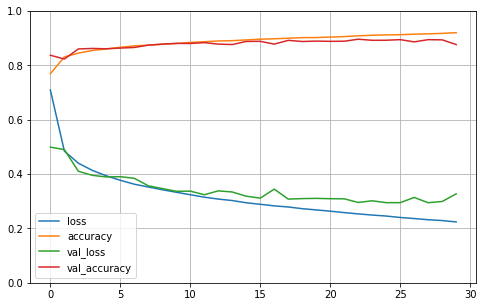

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [89]:
model.fit(X_train, y_train,
    validation_data=(X_valid, y_valid))

1719/1719 [==============================] - 2s 1ms/step - loss: 0.2200 - accuracy: 0.9216 - val_loss: 0.2960 - val_accuracy: 0.8952


In [90]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 62.0196 - accuracy: 0.8532


[62.019588470458984, 0.8532000184059143]

In [91]:
X_new = X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [92]:
y_pred = model.predict_classes(X_new)

/Users/bedwards/.pyenv/versions/3.8.5/envs/data-science/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [93]:
y_pred

array([9, 2, 1])

In [94]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [95]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [96]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 879us/step - loss: 0.8682 - val_loss: 0.5718
Epoch 2/20
363/363 [==============================] - 0s 690us/step - loss: 0.9067 - val_loss: 0.7753
Epoch 3/20
363/363 [==============================] - 0s 759us/step - loss: 0.4843 - val_loss: 0.4557
Epoch 4/20
363/363 [==============================] - 0s 665us/step - loss: 0.4524 - val_loss: 0.4465
Epoch 5/20
363/363 [==============================] - 0s 701us/step - loss: 0.4433 - val_loss: 0.4390
Epoch 6/20
363/363 [==============================] - 0s 688us/step - loss: 0.4333 - val_loss: 0.4330
Epoch 7/20
363/363 [==============================] - 0s 759us/step - loss: 0.4255 - val_loss: 0.4240
Epoch 8/20
363/363 [==============================] - 0s 758us/step - loss: 0.4185 - val_loss: 0.4187
Epoch 9/20
363/363 [==============================] - 0s 689us/step - loss: 0.4181 - val_loss: 0.4354
Epoch 10/20
363/363 [==============================] - 0s 725us/step - loss: 0.410

In [100]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])